In [34]:
from cassia.dispatchers import vessels_dispatcher, ports_dispatcher
from cassia.interpolation import calculate_tidal_windows,plot_tidal_windows

In [35]:
import pandas as pd

ports_df = pd.read_csv("../assets/ports.csv").drop(columns="Unnamed: 0")
tide_heights_df = pd.read_csv("../assets/tide_heights.csv")
vessels_df = pd.read_csv("../assets/vessels.csv").drop(columns="Unnamed: 0")

In [36]:
ports_df

,NAME,LATITUDE,LONGITUDE,UNLOCODE,APPROACH_MLLW_METERS
0,Abbot Point,-19.859141,148.083663,AUABP,17.2
1,Brisbane,-27.376286,153.163766,AUBNE,14.0
2,Cooktown,-15.459552,145.249484,AUCTN,14.1
3,Dampier,-20.663411,116.701119,AUDAM,14.6


In [37]:
tide_heights_df

,TIDE_HEIGHT_ID,PORT_NAME,TIDE_DATETIME,TIDE_HEIGHT_MT,TIDE_TYPE
0,564218779,Abbot Point,2024-03-01 00:47:02.000,1.36,HIGH
1,564218780,Abbot Point,2024-03-01 06:25:59.000,0.97,LOW
2,564218781,Abbot Point,2024-03-01 11:59:30.000,1.41,HIGH
3,564218782,Abbot Point,2024-03-01 18:58:48.000,0.56,LOW
4,564844113,Abbot Point,2024-03-02 12:40:08.000,1.20,HIGH
...,...,...,...,...,...
2321,609489281,Dampier,2024-08-26 02:20:05.000,3.16,HIGH
2322,609489282,Dampier,2024-08-26 08:52:51.000,-0.32,LOW
2323,609489283,Dampier,2024-08-26 14:48:04.000,2.44,HIGH
2324,609489284,Dampier,2024-08-26 20:44:55.000,0.20,LOW


In [38]:
vessels_df

,IMO,DRAUGHT,NAME,DWT
0,9790933,13.418,UNITY LIFE,63482.0
1,9331866,12.573,MING HUA,55682.0
2,9251315,12.020,VIVA GLOBUS,52300.0
3,9494008,14.430,VELSHEDA,82172.0
4,9461128,14.429,NEA TYHI,82211.0
5,9473121,14.210,NIKOLAOS,75538.0
6,9582116,14.450,EPIPHANIA,80276.0
7,9991234,36.800,JIMMY T,1704.0
8,9758571,14.450,HUA SHENG HAI,81232.0
9,9591765,14.900,MBA ROSARIA,93326.0


### Vessels

#### IMO is a unique identifier for the vessel.
#### DRAUGHT indicates how deep the vessel sits in the water.
#### NAME is the vessel's name.
#### DWT shows the vessel's carrying capacity in metric tons.

# Interpoliation

/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data['TIDE_DATETIME'] = pd.to_datetime(port_tide_data['TIDE_DATETIME'])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14*24*60, freq='T')


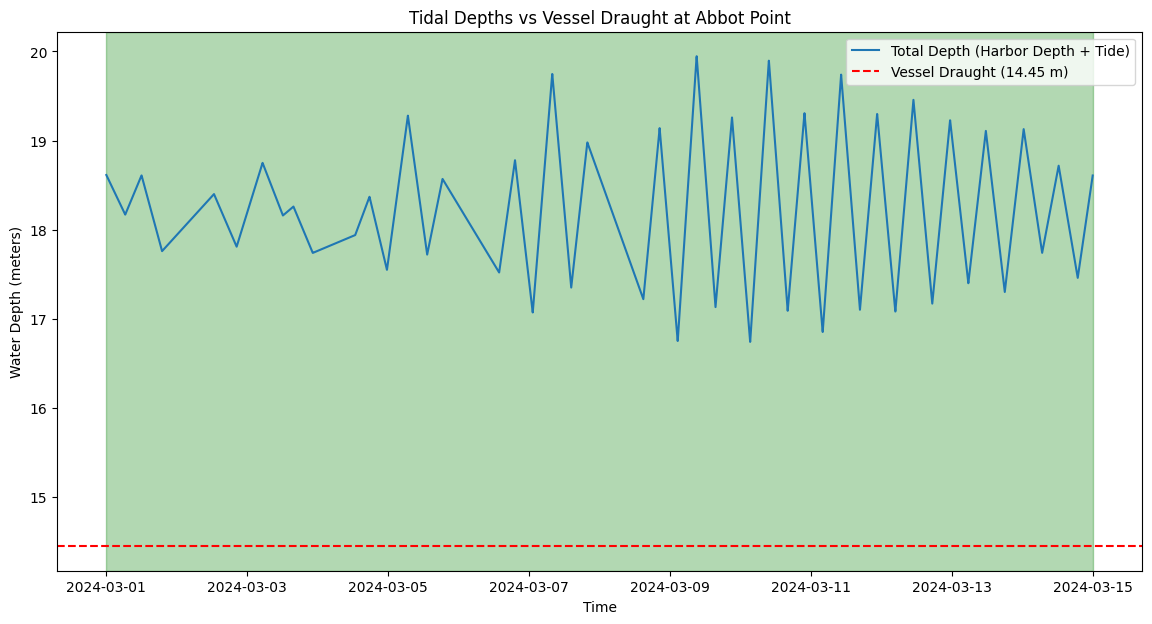

Tidal Window: 2024-03-01 00:00:00 to 2024-03-14 23:59:00


In [39]:
# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUABP'  # UNLOCODE for Abbot Point

# Assuming tide_heights_df is already loaded
tidal_windows, time_range, total_depths = calculate_tidal_windows(imo, unlocode, arrival_time, tide_heights_df, vessels_dispatcher, ports_dispatcher)

# Now plot the results
plot_tidal_windows(tidal_windows, time_range, total_depths, vessels_dispatcher[imo].draught, ports_dispatcher[unlocode].name)

# Output the tidal windows
for window_start, window_end in tidal_windows:
    print(f"Tidal Window: {window_start} to {window_end}")
